<a href="https://colab.research.google.com/github/PankajRaghunadhabhatla/Python/blob/main/Decision_tree_handson_heartdataset_13_12_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree #for working with decision tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# 1 - M, 0 - F
# cp - Chest Pain - (0,1,2,3)
# trestbps - when a patient is resting, whats his BP -
# chol - cholestrol level
# fbs - Blood sugar level during fasting
# restecg - what is the ecg , during resting(0,1)
# thalach - heart rate of the person (Maximum achieved)
# exang - Exercise induce Angina, chest pain for people who hit gym very often 0- No CP, 1 - Yes CP
# oldpeak - these are values of crest and trough of ECG
# slope - slope values
# ca - Maximum number of Major blood vessels ---> 0,1,2,3
# thal - 0,1,2,3
    # Genetic disorder
    # 0 - No Genetic disorder
    # 1- Genetic disorder (fixed effect)--> Cannot be treated
    # 2 - genetic disorder (Reversible) --> Treated
    # 3 - compromised / Not clear because the patient is at stress
# target -
    # 0 - Person is not having heart disease
    # 1 - Person is having a heart disease

In [4]:
# Ensemble technique - Random Forest Model
# Hyperparameter tuning technique - Grid Search CV, Randomized Search CV

In [5]:
# EDA
# Data Analysis
# missing values analysis
# outlier analysis
# visualization -- distribution

# supervised model building part --- classification model
# divide the data into independent and dependent data
# split the data into train and test set
# create your model
# train the model
# test your model --test
# performance of the model -- accuracy score, confusion matrix, classification report


# Decision tree classifier --> classification
# Decision tree

In [6]:
df.shape

(303, 14)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
for i in df.columns:
    print(df[i].value_counts())

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
1    207
0     96
Name: sex, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbps, 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
df[df['chol']>300].shape

(43, 14)

In [12]:
df[(df['chol']> 300) & (df['age']>40)].shape

(42, 14)

In [13]:
f = df[df['thal']==2]
f

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [14]:
f[f['target']==1].shape

(130, 14)

In [15]:
#stat analysis
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
#check  duplicate values
df1 = df[df.duplicated()].value_counts()
df1

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         1
dtype: int64

Text(0.5, 1.0, 'Age Distribution')

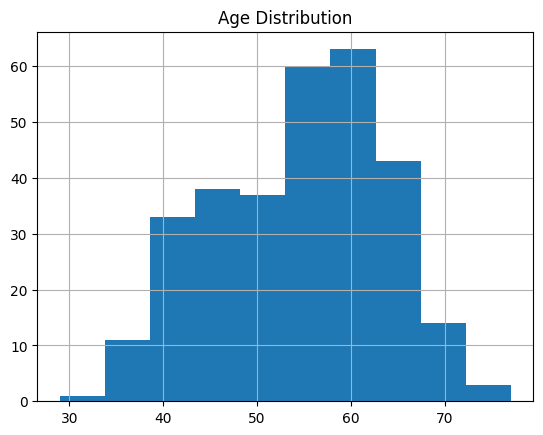

In [17]:
df['age'].hist(grid=True,bins = 10)
plt.title('Age Distribution')

<ipython-input-18-af3ac4a51ada>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([df['age']])


<Axes: ylabel='Density'>

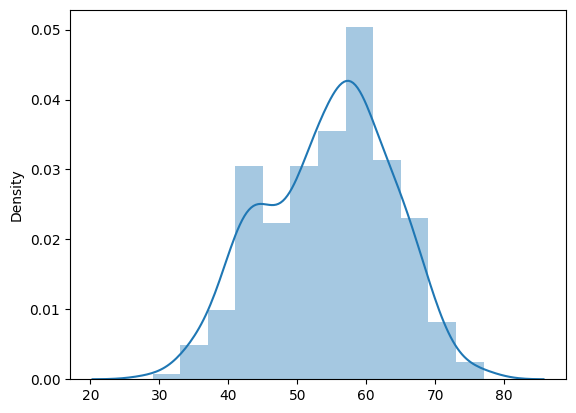

In [18]:
sns.distplot([df['age']])

###### In the above graph we can analyze the distribution of Age column, and we can say that there are 60+ people who are having age between 57 & 63


<ipython-input-19-0ba8d730e3f1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'], label = 'Male')
<ipython-input-19-0ba8d730e3f1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['age'], label = 'Female')


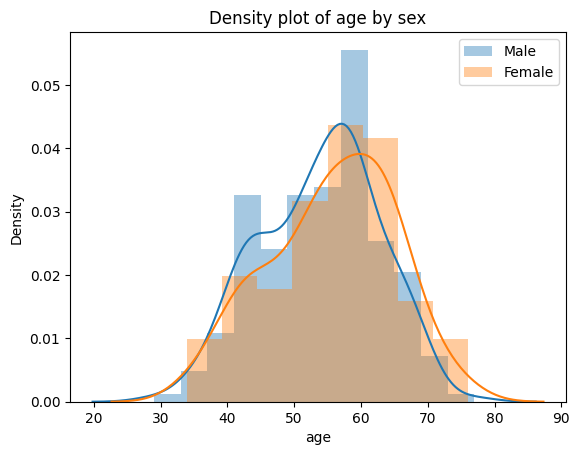

In [19]:
sns.distplot(df[df['sex']==1]['age'], label = 'Male')
sns.distplot(df[df['sex']==0]['age'], label = 'Female')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

###### Density graph is a smoothed representation

<ipython-input-20-b3362b328daf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trestbps'], bins=10)


Text(0.5, 1.0, 'Resting Blood Pressure Density Plot')

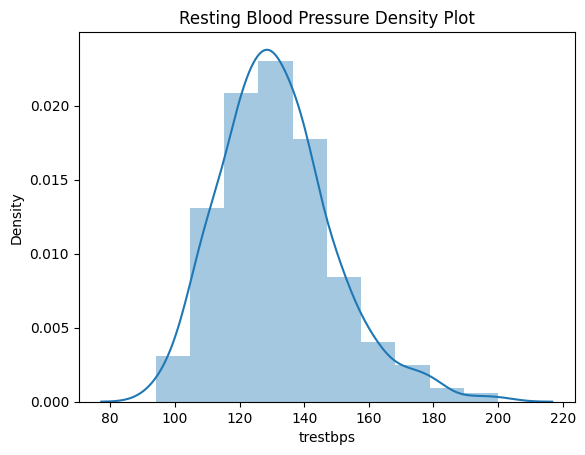

In [20]:
sns.distplot(df['trestbps'], bins=10)
plt.title('Resting Blood Pressure Density Plot')

#### Almost having a normal distribution

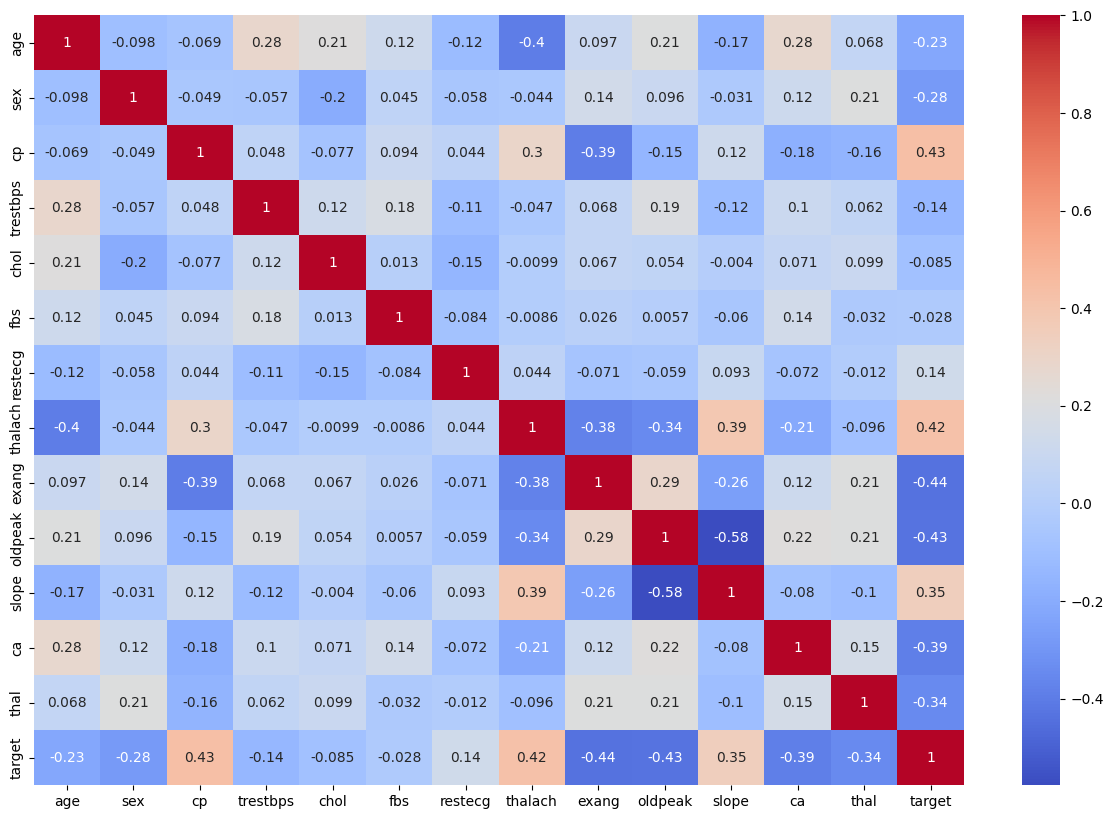

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='oldpeak'>

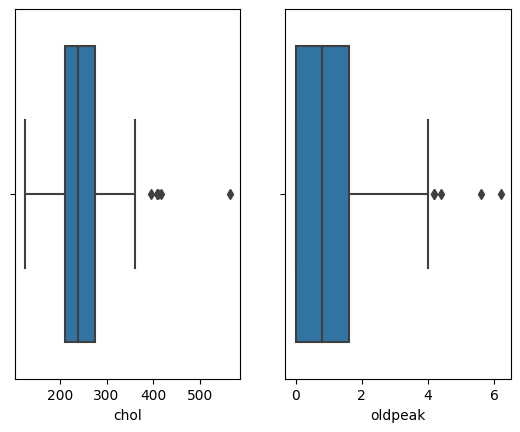

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2)
sns.boxplot(x='chol', data=df, ax=axes[0])
sns.boxplot(x='oldpeak', data=df, ax=axes[1])

In [23]:
#Outliers are not much in these columns
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df>=Q1-1.5*IQR , df<= Q3 + 1.5* IQR
# LL = Q1-1.5*IQR
# UL = Q3 + 1.5* IQR

Text(0.5, 1.0, 'Count of target feature by Sex')

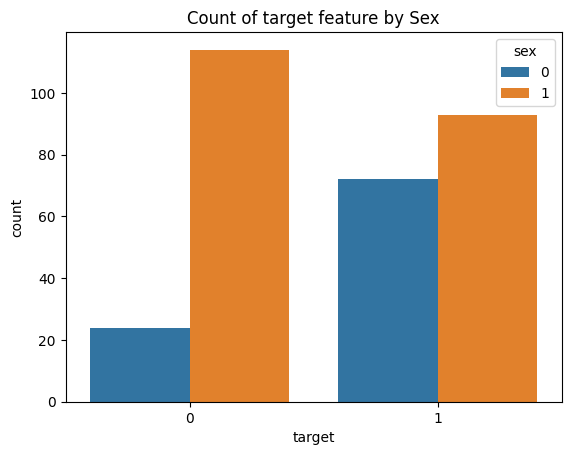

In [24]:
sns.countplot(x='target', data=df, hue='sex')
plt.title('Count of target feature by Sex')

In [25]:
# The amount of healthy male is greater than unhealthy male and vice versa in female.

In [26]:
X = df.iloc[:, :-1]#independed variables
y = df['target']
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [27]:
x_train, x_test, y_train, y_test= train_test_split(X,y, random_state=34, train_size=0.7)
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


In [28]:
clf= tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)#train the model

DecisionTreeClassifier()

In [29]:
#predicting the model
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [30]:
y_test_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0])

In [31]:
accuracy_score(y_test_pred,y_test)

0.8351648351648352

In [32]:
print(f'Test_score {accuracy_score(y_test_pred,y_test)}')

Test_score 0.8351648351648352


In [33]:
confusion_matrix(y_test_pred,y_test)

array([[34,  9],
       [ 6, 42]])

In [34]:
# Hyperparameter tuning --GridsearchCV,

In [35]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df2 = pd.DataFrame(columns=['max_depth', 'accuracy'])
df2

,max_depth,accuracy


In [36]:
# for the first loop , input parameter will be having a value 1
# inside for loop , it will create a dt model with 1 as the max depth value
# model = tree.DecisionTreeClassifier(max_depth=1)

In [37]:
for i in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred) * 100
    df2 = df2.append({'max_depth': i, 'accuracy': acc_score}, ignore_index=True)

df2

<ipython-input-37-57c9e15a3ef1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'max_depth': i, 'accuracy': acc_score}, ignore_index=True)
<ipython-input-37-57c9e15a3ef1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'max_depth': i, 'accuracy': acc_score}, ignore_index=True)
<ipython-input-37-57c9e15a3ef1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'max_depth': i, 'accuracy': acc_score}, ignore_index=True)
<ipython-input-37-57c9e15a3ef1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'max_depth': i, 'accuracy': acc_score}, ignore_index=True)
<ipython-inp

,max_depth,accuracy
0,1.0,76.923077
1,2.0,79.120879
2,3.0,84.615385
3,4.0,80.219780
4,5.0,79.120879
5,6.0,82.417582
6,7.0,82.417582
7,8.0,82.417582
8,9.0,83.516484
9,10.0,82.417582


In [38]:
# So I will create a model with maximum depth of 3
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_score = accuracy_score(y_pred, y_test) * 100
acc_score

84.61538461538461

In [39]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_pred, y_test))
# we are having a balanced prediction . Precision & Recall both are important
# F1 score is important
# The model is good to go as it has balanced score

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        42
           1       0.84      0.88      0.86        49

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [42]:
# Lets see the score after dropping the duplicated value now and perform all the steps again
df3 = df.drop_duplicates()
df3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [44]:
X = df3.iloc[:, :-1]#independed variables
y = df3['target']
print(X.shape)
print(y.shape)

(302, 13)
(302,)


In [45]:
x_train, x_test, y_train, y_test= train_test_split(X,y, random_state=34, train_size=0.7)
print(x_train.shape)
print(x_test.shape)

(211, 13)
(91, 13)


In [46]:
# So I will create a model with maximum depth of 3
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_score = accuracy_score(y_pred, y_test) * 100
acc_score

84.61538461538461

In [47]:
#No effect as one row was removed and accuracy score is same